
# Проверка гипотез с помощью python.

## Задание

* Выполнить проверку предложенной гипотезы
* Выполнить проверку статистической гипотезы для проверки нормальности числовых признаков
* Проверка мультиколлинеарности
* Все статистические тесты должны быть выполнены с 95%-м уровнем достоверности (т.е. значение р < 0,05)

## Датасет

Как данные представлены заказчиком:

<table>
<thead><tr>
<th><strong>Feature Name</strong></th>
<th><strong>Description</strong></th>
<th><strong>Data Type</strong></th>
</tr>
</thead>
<tbody>
<tr>
<td>customerID</td>
<td>Содержит идентификатор клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>gender</td>
<td>Пол клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>SeniorCitizen</td>
<td>Является ли клиент пожилым гражданином</td>
<td>numeric, int</td>
</tr>
<tr>
<td>Partner</td>
<td>Есть ли у клиента партнер</td>
<td>categorical</td>
</tr>
<tr>
<td>Dependents</td>
<td>Является ли клиент кормильцем</td>
<td>categorical</td>
</tr>
<tr>
<td>tenure</td>
<td>Количество месяцев, в течение которых клиент оставался в компании</td>
<td>numeric, int</td>
</tr>
<tr>
<td>PhoneService</td>
<td>Есть ли у клиента телефонная связь</td>
<td>categorical</td>
</tr>
<tr>
<td>MultipleLines</td>
<td>Есть ли у клиента несколько линий</td>
<td>categorical</td>
</tr>
<tr>
<td>InternetService</td>
<td>Интернет-провайдер клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineSecurity</td>
<td>Есть ли у клиента онлайн-безопасность</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineBackup</td>
<td>Есть ли у клиента онлайн-резервное копирование</td>
<td>categorical</td>
</tr>
<tr>
<td>DeviceProtection</td>
<td>Имеет ли клиент защиту устройства</td>
<td>categorical</td>
</tr>
<tr>
<td>TechSupport</td>
<td>Есть ли у клиента техническая поддержка</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingTV</td>
<td>Есть ли у клиента потоковое телевидение</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingMovies</td>
<td>Есть ли у клиента стриминговые сервисы</td>
<td>categorical</td>
</tr>
<tr>
<td>Contract</td>
<td>Срок действия контракта заказчика</td>
<td>categorical</td>
</tr>
<tr>
<td>PaperlessBilling</td>
<td>имеет ли клиент безналичные счета</td>
<td>categorical</td>
</tr>
<tr>
<td>PaymentMethod</td>
<td>Способ оплаты клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>MonthlyCharges</td>
<td>Сумма, взимаемая с клиента ежемесячно </td>
<td> numeric , int</td>
</tr>
<tr>
<td>TotalCharges</td>
<td>Общая сумма, списанная с клиента</td>
<td>object</td>
</tr>
<tr>
<td>Churn</td>
<td>Ушел ли клиент</td>
<td>categorical</td>
</tr>
</tbody>
</table>

Описание от заказчика:

Каждая строка представляет клиента, каждый столбец содержит атрибуты клиента.

Набор данных включает информацию :

- Клиенты, которые ушли в течение последнего месяца — колонка называется `Churn`
- Услуги, на которые подписался каждый клиент — телефон, несколько линий, интернет, онлайн-безопасность, резервное копирование, защита устройств, техническая поддержка, потоковое ТВ и фильмы.
- Информация о счетах клиентов — как долго они являются клиентами, контракт, способ оплаты, безналичные счета, ежемесячные платежи и общая сумма платежей.
- Демографическая информация о клиентах — пол, возраст, наличие партнеров и иждивенцев.

## 1. Импорт Библиотек 

Импортируйте необходимые библиотеки

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None) # отобразить все колонки

from scipy import stats

## Данные

In [28]:
df = pd.read_csv("./churn.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Описательный анализ данных

Рассмотрите данные — изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [29]:
# ваше решение
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


**Вывод:**
- 16% клиентов являются пожилыми гражданинами (людьми);
- среднее количество месяцев в течении которых клиенты оставались в компании 32.3;
- средняя сумма взымаемая с клиентов ежемесячно равна 64.7, стандартное отклонение по этому параметру равно 30, что также подтверждает параметр 75%(q3), который равен 89.8.

### Уникальные значения для всех столбцов

Рассмотрите уникальные значения категориальных признаков. 

Сделайте вывод.

**Подсказка:** можете воспользоваться методом `describe(include='object')`

In [30]:
# ваше решение
df.describe(include='object')


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


**Вывод:**
- Около 50% клиентов пользуются услугами провайдера Fiber optic;
- Также чуть более половины клиентов имеют месячную подписку;
- Столбец TotalCharges имеет 11 пустых строк (что наверное необходимо исправлять)

## 3. Предобработка данных

### Дубликаты

Предобработайте датасет — проверьте на наличие дубликатов и удалите, если они есть.

In [31]:
# Дубликаты в этом датасете наверняка необходимо проверять только по столбцу customerID
if df.duplicated(subset=['customerID']).any():
    print("Датафрейм содержит дубликаты")
    df.drop_duplicates(subset=['customerID'])
else:
    print("Датафрейм не содержит дубликаты")

Датафрейм не содержит дубликаты


### Отсутствующие значения

Пояснение к данному датасету:

Не всегда в данных есть явные пропуски, которые легко индексируются средствами Pandas. К сожалению, бывают проблемы с выгрузками данных, некачественными источниками, или, когда данные записываются вручную — часто присутствует человеческий фактор. По мере работы с новыми данными лучше проверять на наличие таких данных, иначе из-за этого исследование может исказиться.

Рассмотрим такой случай:

In [32]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Да, не видно пропусков. Но почему тогда столбец `TotalCharges` не отобразился изначально как числовой столбец?

Проверим все столбцы:

In [33]:
for col in df:
    if df[col].dtype == 'object':
        nans = df[col].apply(lambda x: len(x.strip())==0).sum()
        if nans > 0:
            print(f'Неявные пропуски столбца {col}:', df[col].apply(lambda x: len(x.strip())==0).sum())

Неявные пропуски столбца TotalCharges: 11


Что мы можем сделать в таком случае?

1) По этому же фильтру удалить строки с пропусками, чтобы не искажать данные
2) Перевести тип столбца на числовой с параметром `errors = 'coerce'` и удалить

Но можно не удалять, чтобы не потерять данные, а:

1) Заменить значения на другое
2) Поменять на другое — но только в том случае, если есть какая-то зависимость в данных.

Давайте изменим тип и найдем зависимость:

In [34]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')

df[df["TotalCharges"].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**Но как выглядят наши данные обычно?**

In [35]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3327,9494-BDNNC,Male,0,Yes,No,66,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,One year,No,Electronic check,95.30,6273.40,No
197,6168-YBYNP,Male,0,No,No,59,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.35,6519.75,No
830,9101-BWFSS,Female,0,Yes,No,50,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,One year,No,Electronic check,108.55,5610.70,Yes
1767,3669-WHAFY,Female,0,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),115.15,8078.10,No
6986,3976-BWUCK,Female,0,Yes,No,30,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),94.10,2804.45,Yes


**Ничего не заметили?**

Может общая сумма, списанная с клиента, равна сумме, взимаемой с клиента ежемесячно, умноженной на количество времени?

Давайте посмотрим.

In [36]:
df[(df['TotalCharges'] / df['MonthlyCharges']) == df['tenure']].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No


Нашей гипотезе есть место быть.

Значит `TotalCharges` = `MonthlyCharges` * время. В данном датасете указано только количество месяцев, без точного времени, потому будет грубо просто перемножить один столбец на другой. Но пропуски мы уже можем заменить на `0`, так как в тех строках `tenure` == 0.

Заменим пропуски на нужное нам число.

In [37]:
df['TotalCharges'].fillna(0, inplace=True)


### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа — на `int` или `float`
- Если категории — можно оставить `object`

In [38]:
df['SeniorCitizen'].astype('int')
df['tenure'].astype('int')
df.info()

''' 

Можно еще и категории где Yes и No заменить, так как они тоже бинарные, 
но в задании только про числа сказанно поэтому приклеплю код для этого действия в комментарии:

df['column_name'].replace({'Yes': 1, 'No': 0})

'''


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


" \n\nМожно еще и категории где Yes и No заменить, так как они тоже бинарные, \nно в задании только про числа сказанно поэтому приклеплю код для этого действия в комментарии:\n\ndf['column_name'].replace({'Yes': 1, 'No': 0})\n\n"

In [39]:
# Дубликаты в этом датасете наверняка необходимо проверять только по столбцу customerID
if df.duplicated(subset=['customerID']).any():
    print("Датафрейм содержит дубликаты")
    df.drop_duplicates(subset=['customerID'])
else:
    print("Датафрейм не содержит дубликаты")

Датафрейм не содержит дубликаты


**Вывод:**
- после проделанных манипуляций у нас 4 столбца с числовыми данными и 17 с категориальными;
- общее количество записей не изменилось.


## 4. Проверка гипотез

Задание: сравнить две выборки - `Churn='No'` и `Churn='Yes'` 

Гипотеза — среднее количество месяцев, в течение которых клиент оставался в компании, отличается между двумя выборками.

In [40]:
alpha = .05


# Проверка гипотезы о равенстве средних значений количества месяцев, в течение которых клиент оставался в компании, для двух выборок
_, pvalue = stats.ttest_ind(df[df['Churn'] == 'No'].groupby('customerID')['tenure'].mean(), 
                             df[df['Churn'] == 'Yes'].groupby('customerID')['tenure'].mean())

# Так как мы проверяли гипотезу о равенстве выборок, а взадании сказанно проверить гипотезу о отличии, то изменим условие
if pvalue < alpha:
    print(f'P-value:{pvalue}. Подтверждается нулевая гипотеза')
else:
    print(f'P-value:{pvalue}. Нулевая гипотеза отвергается')

P-value:7.99905796059022e-205. Подтверждается нулевая гипотеза


**Вывод:**
Гипотеза подтвердилась, наверное это связанно с тем, что в большенстве своем клиенты которые ушли сделали это в короткий промежуток аремени, возможно из-за того что были недовольны услугами. 

## 5. Статистический анализ на норму

Задание: выберите числовые признаки и проведите анализ — соответствуют ли распределения нормальному?

In [41]:
# ваше решение
_, pvalue = stats.normaltest(df['tenure'])

alpha = 0.05

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


<Axes: >

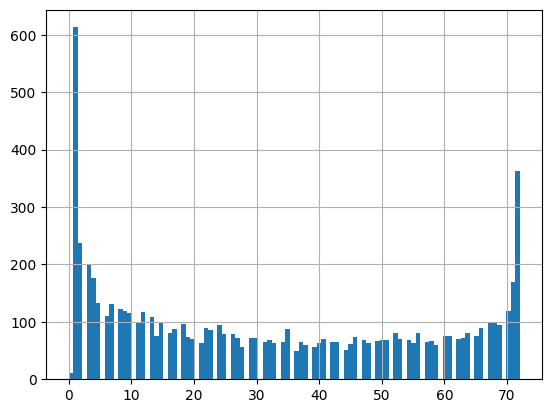

In [42]:
df['tenure'].hist(bins=100)

In [43]:
# ваше решение
_, pvalue = stats.normaltest(df['TotalCharges'])

alpha = 0.05

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


<Axes: >

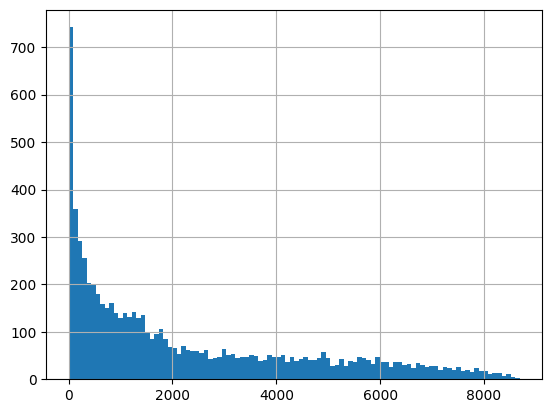

In [44]:
df['TotalCharges'].hist(bins=100)

**Вывод:**
Выбранные числовые параметры распределенны не по нормальному закону

# Общий вывод

Опишите данные и результат исследования, основываясь на предыдущих шагах:
- анализ данных датасета позволил выявить прупуски в исходных данных, а также предположить что пропуски можно заменить на 0;
- замена объектов типа object на int или float позволил расширить критерии по которым можно проверять гипотезы;
- нулевая гипотеза "Среднее количество месяцев, в течение которых клиент оставался в компании, отличается между двумя выборками" подтвердилась;
- статический анализ на норму выбранных данных показал, что они не соответствуют распределению Гауса.

## 6. ЗАДАЧИ PRO

Мы провели базовый анализ выше и сделали выводы.

Но требование заказчика — выяснить причину ухода клиента.

Ваша задача — провести полный анализ с помощью статистических гипотез взаимосвязи всех признаков с нашим таргетом `Churn` (целевым признаком). 

**Этапы:**

1.	Предобработка данных — измените датасет в части: категориальные признаки надо перевести в числовые представления. Главное —понимать взаимосвязь: бинарный признак, порядковый, просто категории или что-то иное.
2.	Выберите нужные гипотезы, основываясь на типах признаков.
3.	Проведите анализ и выясните, почему клиент уходит, с чем коррелирует Churn, может это зависит от пола клиента? Или есть иные обстоятельства?
4.	После проверки гипотез постройте тепловую карту корреляции Phik и сделайте дополнительный вывод.
5.	Дополните общий вывод.


**Примечание:** задание не ограничено только этими этапами. Можно их дополнить — может стоит сделать фильтр данных, рассмотреть данные под другим углом и провести дополнительную аналитику? Средствами и методами не ограничены.

In [45]:
#Выводим первые пять строчек DataFrame
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Предобрабатываем данные для анализа

In [46]:
#Кодируем категориальные признаки в числовые значения
for col in df.columns:
    encoded_valuer, category = df[col].factorize()
    
    #Делаем понятный вывод
    if len(category)<5:
        print(f'В столбце {col} уникальные категории {list(category)} заменены на значения {pd.unique(encoded_valuer)}')
    df[col] = pd.factorize(df[col])[0] # здесь берем нулевой элемент т.к. factorize возвращает значение и категорию

# Дальше выводим пять случайных значений из DataFrame
df.sample(5)

В столбце gender уникальные категории ['Female', 'Male'] заменены на значения [0 1]
В столбце SeniorCitizen уникальные категории [0, 1] заменены на значения [0 1]
В столбце Partner уникальные категории ['Yes', 'No'] заменены на значения [0 1]
В столбце Dependents уникальные категории ['No', 'Yes'] заменены на значения [0 1]
В столбце PhoneService уникальные категории ['No', 'Yes'] заменены на значения [0 1]
В столбце MultipleLines уникальные категории ['No phone service', 'No', 'Yes'] заменены на значения [0 1 2]
В столбце InternetService уникальные категории ['DSL', 'Fiber optic', 'No'] заменены на значения [0 1 2]
В столбце OnlineSecurity уникальные категории ['No', 'Yes', 'No internet service'] заменены на значения [0 1 2]
В столбце OnlineBackup уникальные категории ['Yes', 'No', 'No internet service'] заменены на значения [0 1 2]
В столбце DeviceProtection уникальные категории ['No', 'Yes', 'No internet service'] заменены на значения [0 1 2]
В столбце TechSupport уникальные категор

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1272,1272,1,0,0,1,24,1,1,2,2,2,2,2,2,2,0,1,1,93,1246,0
235,235,1,0,1,0,2,1,2,0,0,0,0,0,0,0,0,0,1,60,233,1
1276,1276,0,1,0,0,16,1,1,1,1,0,1,1,1,0,2,0,0,772,1250,0
1413,1413,1,0,0,1,45,1,2,1,1,0,1,1,0,0,2,1,3,446,1382,0
4880,4880,1,0,0,0,37,1,1,2,2,2,2,2,2,2,2,1,1,155,4608,0


### Выдвигаем гипотезы

****
   **Нулевая:** клиенты являющиеся кормильцами отказываются от услуг также как и не являющимися кормильцами</br>
   
   **Альтарнативная:** клиенты являющиеся кормильцами отказываются от услуг реже чем клиенты не являющимися кормильцами</br>
****
   **Нулевая:** мужчины отказываются от услуг также как и женщины</br>

   **Альтарнативная:** мужчины отказываются от услуг чаще чем женщины</br>
****
   **Нулевая:** клиенты имеющие техническую поддержку отказываются от услуг также как и клиенты не имеющие техническую поддержку </br>

   **Альтарнативная:** клиенты имеющие техническую поддержку отказываются от услуг реже клиентов не имеющих техническую поддержку</br>
****

### Проверяем 1 гипотезу

- Kлиенты являющиеся кормильцами отказываются от услуг также как и не являющимися кормильцами

In [47]:
_, pvalue = stats.ttest_ind(df[df['Churn']==1]['Dependents'], df[df['Churn']==0]['Dependents'])

alpha = 0.05

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


Нулевая гипотеза отвергается, поэтому проверим кто отказывается чаще кормильцы или не кормильцы

In [48]:
df[df['Churn']==1]['Dependents'].value_counts()

Dependents
0    1543
1     326
Name: count, dtype: int64

**Вывод по 1 гипотезе:** подтвердилась альтернативная гипотеза, которая говорит о том, что клиенты не являющиеся кормильцами отказываются от услуг чаще чем кормильцы

### Проверяем 2 гипотезу

- Мужчины отказываются от услуг также как и женщины

In [49]:
_, pvalue = stats.ttest_ind(df[df['Churn']==1]['gender'], df[df['Churn']==0]['gender'])

alpha = 0.05

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.46990. Подтверждается нулевая гипотеза


**Вывод по 2 гипотезе:** подтвердилась нулевая гипотеза, которая говорит о том, что мужчины отказываются от услуг также как и женщины

### Проверяем 3 гипотезу

- Клиенты имеющие техническую поддержку отказываются от услуг также как и клиенты не имеющие техническую поддержку

In [50]:
_, pvalue = stats.ttest_ind(df[df['Churn']==1]['TechSupport'], df[df['Churn']==0]['TechSupport'])

alpha = 0.05

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


Нулевая гипотеза отвергается, поэтому проверим кто отказывается чаще имеющие тех. поддержку или не имеющие

In [51]:
df[df['Churn']==1]['TechSupport'].value_counts()

TechSupport
0    1446
1     310
2     113
Name: count, dtype: int64

**Вывод по 3 гипотезе:** подтвердилась альтернативная гипотеза, которая говорит о том, что клиенты имеющие техническую поддержку отказываются от услуг реже клиентов не имеющих техническую поддержку

### Строим тепловую карту корреляции Phik

<Axes: >

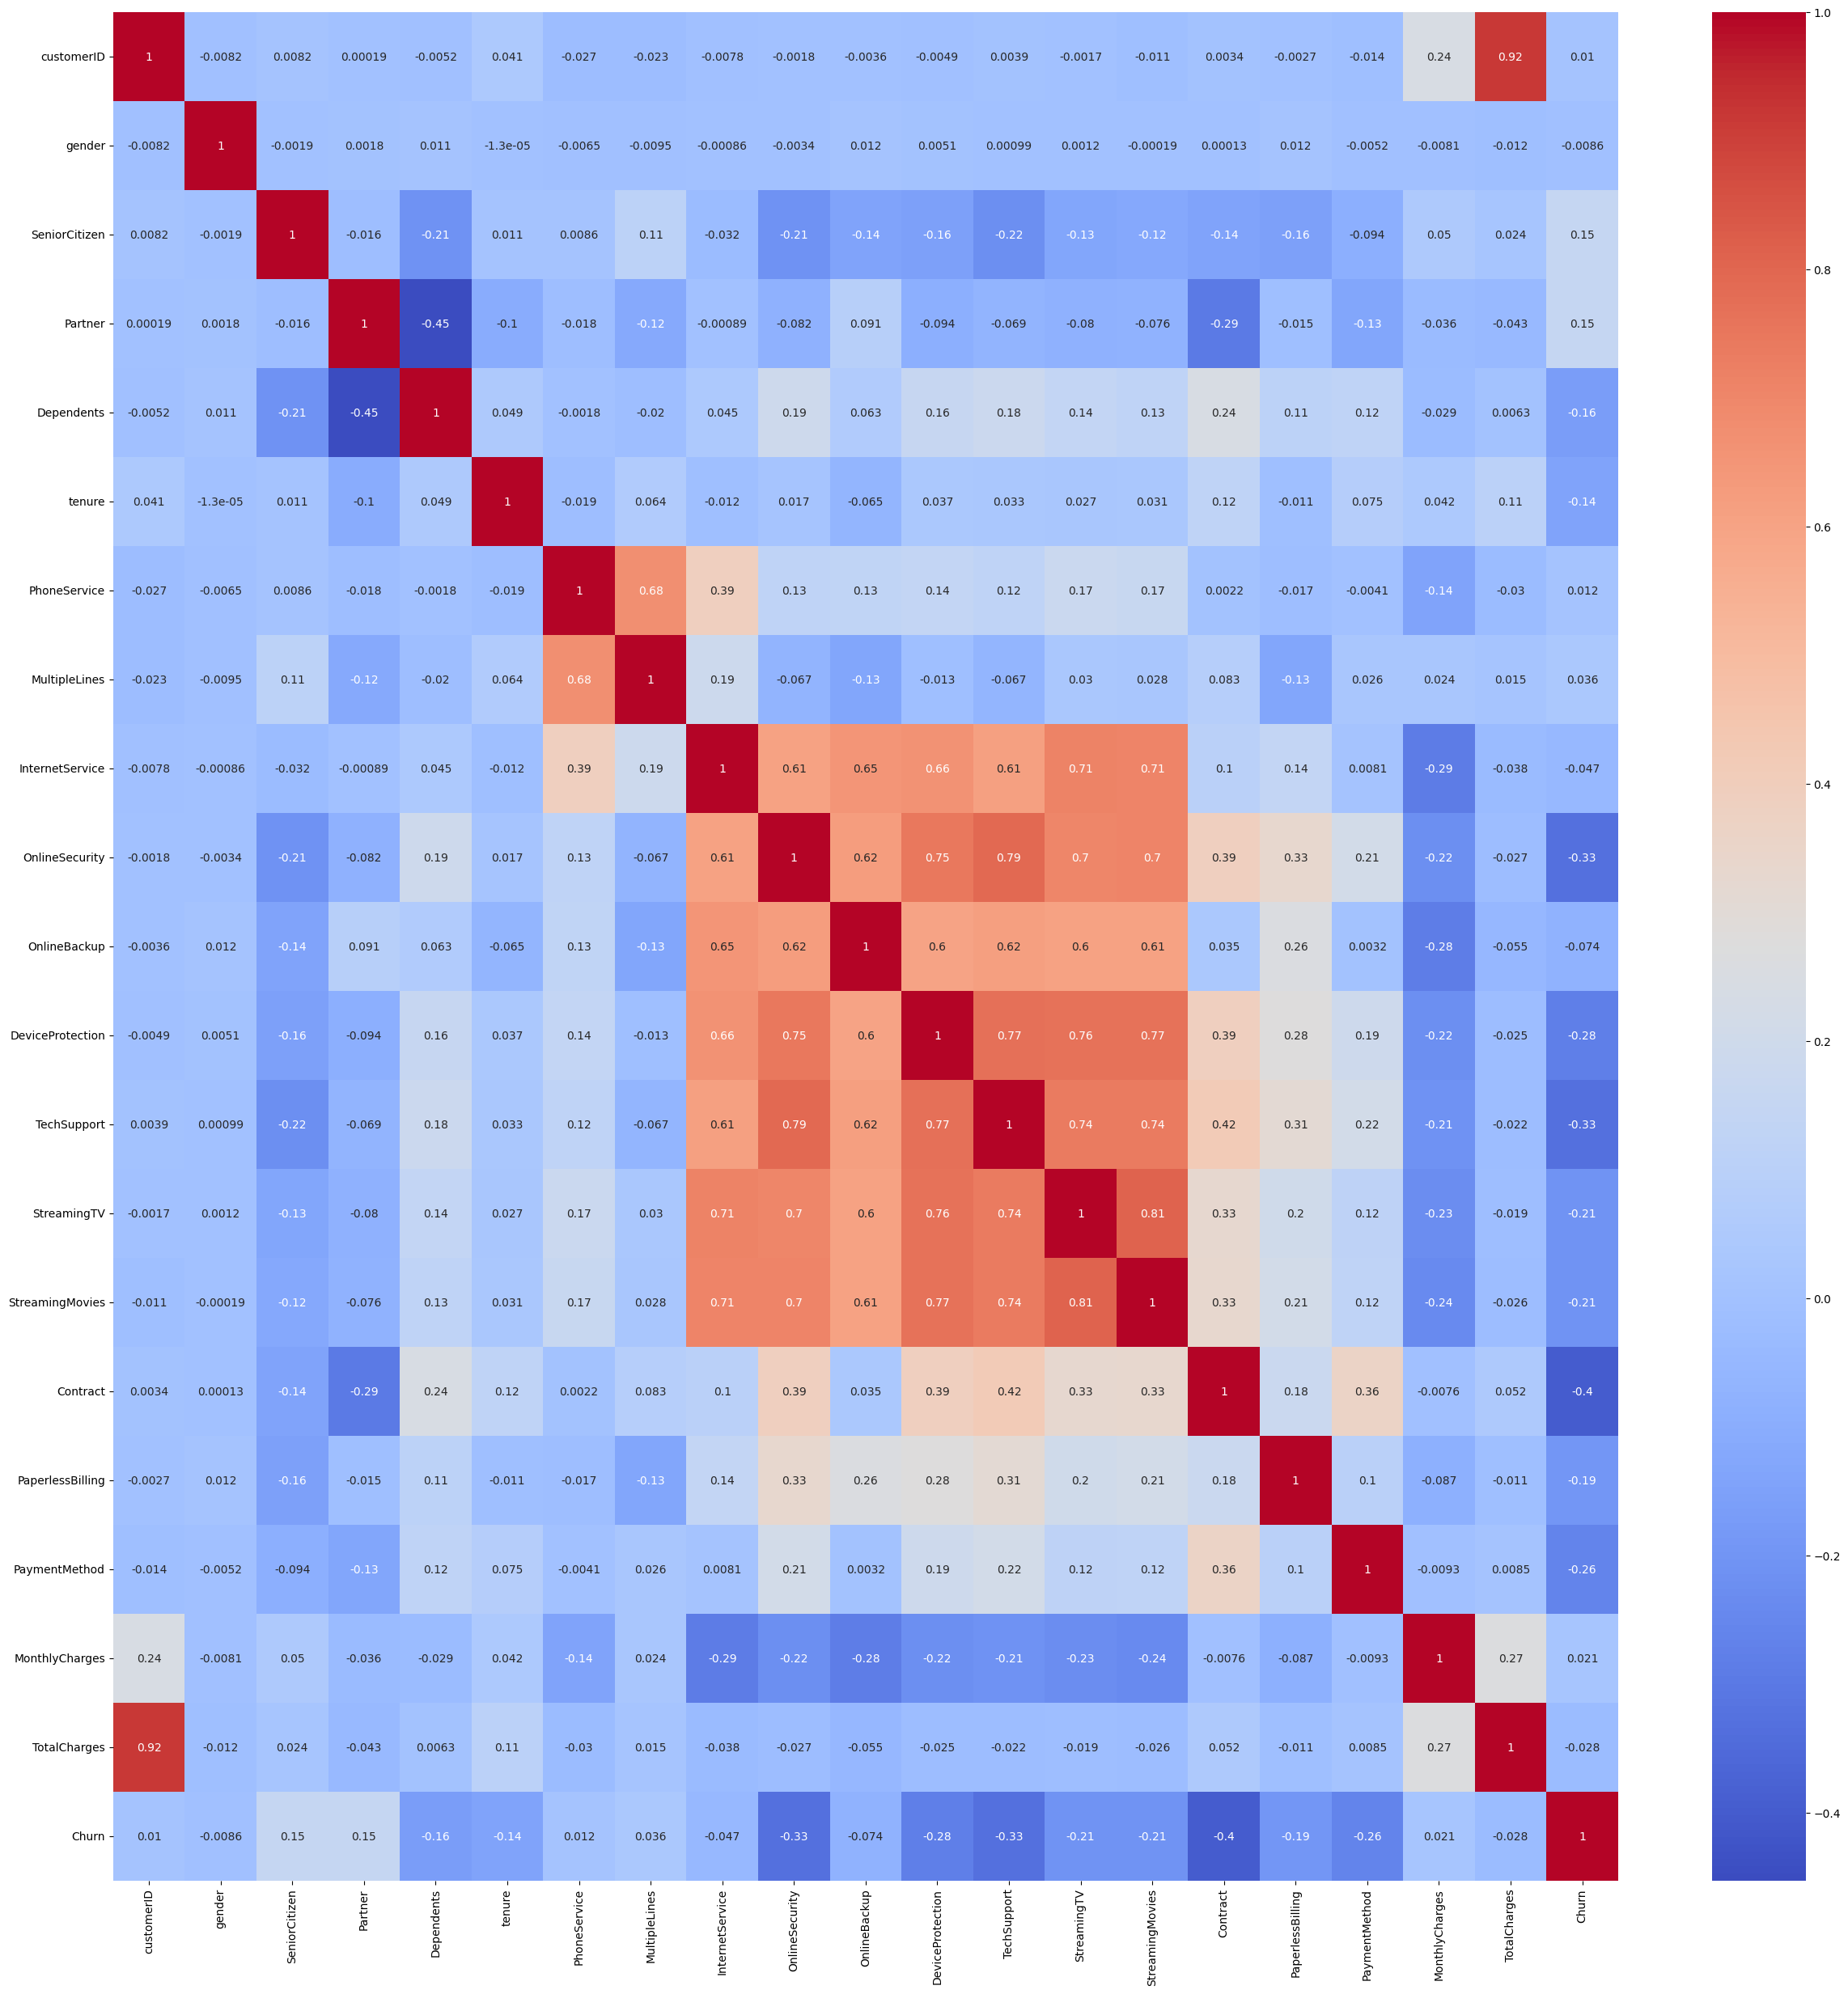

In [52]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Общий вывод

#### Проведенный анализ предложенных гипотез позволил сделать следующие выводы:

- **Вывод по 1 гипотезе:** подтвердилась альтернативная гипотеза, которая говорит о том, что клиенты не являющиеся кормильцами отказываются от услуг чаще чем кормильцы

- **Вывод по 2 гипотезе:** подтвердилась нулевая гипотеза, которая говорит о том, что мужчины отказываются от услуг также как и женщины

- **Вывод по 3 гипотезе:** подтвердилась альтернативная гипотеза, которая говорит о том, что клиенты имеющие техническую поддержку отказываются от услуг реже клиентов не имеющих техническую поддержку




#### Анализ тепловой карты корреляции позволил сделать дополнительные выводы:
- Клиенты которые не имеют онлайн безопасности поддержки немного чаще уходят
- Клиенты которые заключают договор c помесячной оплатой немного чаще уходят